<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/BBC_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-05-11 15:15:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2021-05-11 15:15:49 (145 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [16]:
import csv
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [4]:
len(stopwords)

153

In [5]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv","r") as csvfile:
  next(csvfile)
  for item in csvfile:
    text = item.split(',')[1].replace("  "," ")
    text = ' '.join(x for x in text.split(' ') if x not in stopwords)
    sentences.append(text)
    labels.append(item.split(',')[0])
print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = int((80/100)*len(sentences))

In [7]:
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [8]:
print(len(train_sentences),len(train_labels))
print(len(test_sentences),len(test_labels))

1780 1780
445 445


In [9]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(len(word_index))

27285


In [10]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

449
120


In [11]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(len(test_sequences))
print(test_padded.shape)

445
(445, 120)


In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
print(len(label_word_index))

5


In [17]:
train_label_sequences = np.array(label_tokenizer.texts_to_sequences(train_labels))
print(train_label_sequences.shape)

(1780, 1)


In [18]:
test_label_sequences = np.array(label_tokenizer.texts_to_sequences(test_labels))
print(test_label_sequences.shape)

(445, 1)


In [20]:
import numpy as np
train_padded = np.array(train_padded)
test_padded = np.array(test_padded)

In [21]:
import tensorflow as tf

In [22]:
#Defining the layers
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(24,activation='relu'),
                                    tf.keras.layers.Dense(6,activation='softmax')])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                46104     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 62,254
Trainable params: 62,254
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.99:
      print('\nAchieved 99% accuracy so training cancelled')
      self.model.stop_training = True

In [26]:
history = model.fit(train_padded,train_label_sequences,validation_data=(test_padded,test_label_sequences),epochs=50,callbacks=[myCallback()])

Epoch 1/50
56/56 [==============================] - 1s 7ms/step - loss: 1.7265 - accuracy: 0.2396 - val_loss: 1.5893 - val_accuracy: 0.2809
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 1.4979 - accuracy: 0.3626 - val_loss: 1.2618 - val_accuracy: 0.6876
Epoch 3/50
56/56 [==============================] - 0s 3ms/step - loss: 0.9305 - accuracy: 0.8207 - val_loss: 0.6026 - val_accuracy: 0.8562
Epoch 4/50
56/56 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.9502 - val_loss: 0.3848 - val_accuracy: 0.8921
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.9831 - val_loss: 0.3064 - val_accuracy: 0.8966
Epoch 6/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9955 - val_loss: 0.2472 - val_accuracy: 0.9281

Achieved 99% accuracy so training cancelled


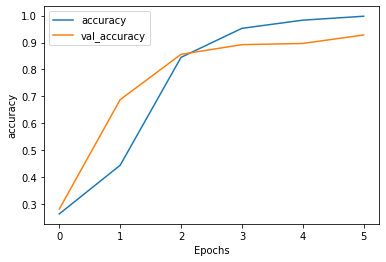

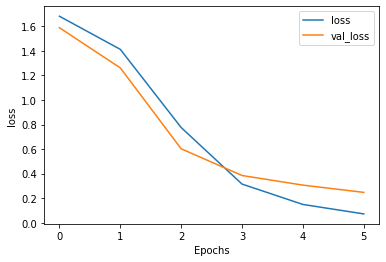

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")